In [1]:
#!/usr/bin/env python

In [2]:
import os
import sys
if os.path.exists('/home/chieh/code/wPlotLib'):
	sys.path.insert(0,'/home/chieh/code/wPlotLib')
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [3]:
import wuml
import numpy as np
import torch
import wplotlib

Examples of both "with" and "without" batch normalization<br>
The idea of training a neural network boils down to 3 steps<br>
	1. Define a network structure<br>
		Example: This is a 3 layer network with 100 node width<br>
			networkStructure=[(100,'relu'),(100,'relu'),(1,'none')]<br>
			Potential Activation Functions are: softmax, relu, tanh, sigmoid, none<br>
	2. Define a cost function<br>
	3. Call train()

In [4]:
data = wuml.wData(xpath='../../data/regress.csv', ypath='../../data/regress_label.csv', batch_size=20, label_type='continuous')
def costFunction(x, y, ŷ, ind):
	return torch.sum((y- ŷ) ** 2)	

----------------------------------------------<br>
Create basic network and train

In [5]:
bNet = wuml.basicNetwork(costFunction, data, networkStructure=[(30,'relu'),(50,'relu'),(1,'none')], max_epoch=500, learning_rate=0.001)
bNet.train(print_status=True)
Ŷ = bNet(data, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

	epoch: 500, Avg Loss: 4.7785, Learning Rate: 0.00100000

Check out our predictions

In [6]:
SR = wuml.summarize_regression_result(data.Y, Ŷ)
print(SR.true_vs_predict(print_result=False))

     0     1
0    y     ŷ
1  1.1   1.1
2  1.1   1.6
3  2.2   1.6
4  1.0   2.2
5  2.0   2.2
6  3.0   2.2
7  2.0  2.87
8  3.0  2.87
9  4.0  2.87


Draw the regression line

In [7]:
newX = np.expand_dims(np.arange(0,5,0.1),1)
Ŷline = bNet(newX, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

----------------------------------------------<br>
Create network with batch normalization and train

In [8]:
bNet = wuml.basicNetwork(costFunction, data, networkStructure=[(30,'relu'),('bn'), (50,'relu'),('bn'),(1,'none')], max_epoch=500, learning_rate=0.001)
bNet.train(print_status=True)
Ŷ = bNet(data, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

	epoch: 500, Avg Loss: 4.6050, Learning Rate: 0.00003125

Check out our predictions

In [9]:
SR = wuml.summarize_regression_result(data.Y, Ŷ)
print(SR.true_vs_predict(print_result=False))

     0     1
0    y     ŷ
1  1.1   1.1
2  1.1  1.65
3  2.2  1.65
4  1.0   2.0
5  2.0   2.0
6  3.0   2.0
7  2.0   3.0
8  3.0   3.0
9  4.0   3.0


Draw the regression line

In [10]:
newX_bn = np.expand_dims(np.arange(0,5,0.1),1)
Ŷline_bn = bNet(newX_bn, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

plot the results out

In [13]:
splot = wplotlib.scatter(data.X, data.Y, marker='o', show=False, subplot=121)
lp = wplotlib.lines(newX, Ŷline, title_font=10, title='Without Batch Normalization', show=False)	# show must be false if it is a subplot

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


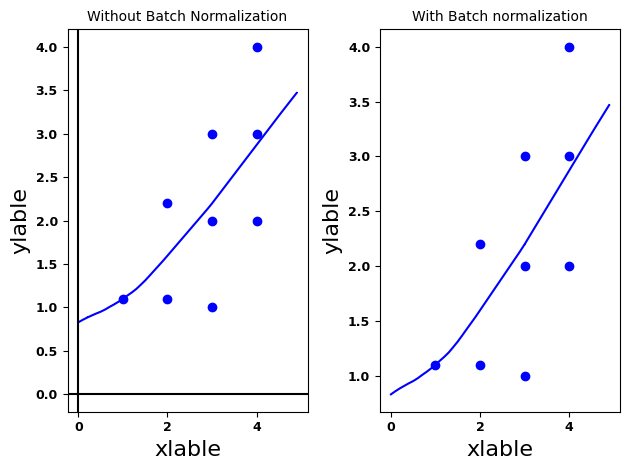

In [14]:
splot = wplotlib.scatter(data.X, data.Y, marker='o', show=False, subplot=122)
lp = wplotlib.lines(newX, Ŷline, title_font=10, title='With Batch normalization')	